In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:

x_train = x_train.reshape(-1, 28, 28, 1).astype('float32')
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32')


In [5]:
# 3. Normalize the pixel values to be between 0 and 1
x_train /= 255.0
x_test /= 255.0


In [6]:
# 4. One-hot encode the labels (since it's a multi-class classification problem)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes (for 10 different fashion categories)
])


In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [9]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), verbose=2)


Epoch 1/10
938/938 - 44s - loss: 0.6194 - accuracy: 0.7744 - val_loss: 0.4615 - val_accuracy: 0.8309 - 44s/epoch - 47ms/step
Epoch 2/10
938/938 - 40s - loss: 0.4095 - accuracy: 0.8503 - val_loss: 0.4001 - val_accuracy: 0.8549 - 40s/epoch - 43ms/step
Epoch 3/10
938/938 - 40s - loss: 0.3513 - accuracy: 0.8704 - val_loss: 0.3613 - val_accuracy: 0.8688 - 40s/epoch - 43ms/step
Epoch 4/10
938/938 - 37s - loss: 0.3110 - accuracy: 0.8854 - val_loss: 0.3604 - val_accuracy: 0.8703 - 37s/epoch - 39ms/step
Epoch 5/10
938/938 - 35s - loss: 0.2843 - accuracy: 0.8934 - val_loss: 0.3238 - val_accuracy: 0.8814 - 35s/epoch - 37ms/step
Epoch 6/10
938/938 - 38s - loss: 0.2598 - accuracy: 0.9040 - val_loss: 0.3303 - val_accuracy: 0.8829 - 38s/epoch - 40ms/step
Epoch 7/10
938/938 - 41s - loss: 0.2373 - accuracy: 0.9117 - val_loss: 0.3160 - val_accuracy: 0.8906 - 41s/epoch - 43ms/step
Epoch 8/10
938/938 - 40s - loss: 0.2219 - accuracy: 0.9174 - val_loss: 0.3080 - val_accuracy: 0.8924 - 40s/epoch - 43ms/step


In [10]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {accuracy:.2f}")

313/313 [==============================] - 3s 10ms/step - loss: 0.3136 - accuracy: 0.8924
Test accuracy: 0.89


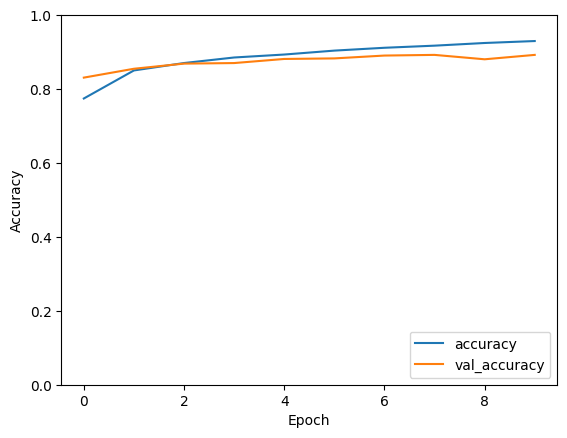

In [11]:
# 9. Plot the training history (optional)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [12]:

# 10. Predict (optional) and display some sample predictions
predictions = model.predict(x_test)




313/313 [==============================] - 3s 9ms/step


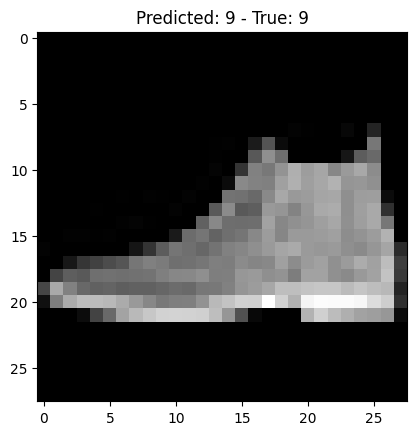

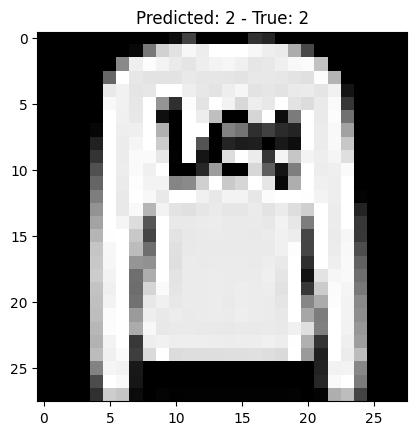

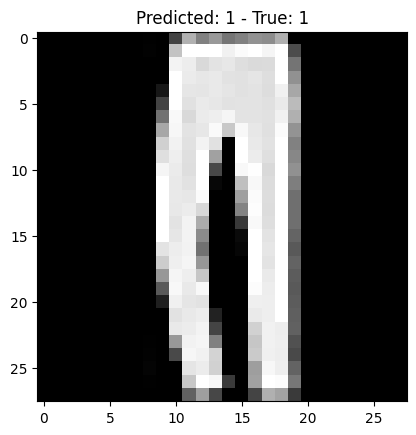

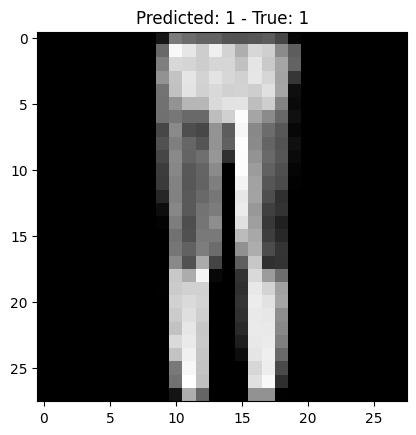

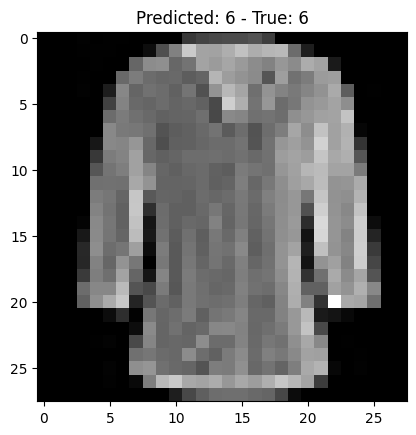

In [13]:
# Display the first 5 test images with their predicted labels
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predictions[i].argmax()} - True: {y_test[i].argmax()}")
    plt.show()